In [1]:
from tnia.deconvolution.psfs import gibson_lanni_3D
#from sdeconv.deconv import PSFGibsonLanni
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from tnia.nd.ndutil import centercrop

In [2]:
base_dir ='/home/bnorthan/Images/tnia-python-images/notebooks/'
base_dir =r'D:\images\tnia-python-images\notebooks//'

dir_name=base_dir+'segmentation/nuclei/'

input_name=dir_name+"nuclei1_out_c00_dr90_image.tif" 
input_name=dir_name+"|nuclei4_out_c90_dr10_image.tif"
input_name=dir_name+"nuclei2_out_c90_dr90_image.tif"
#decon_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei2_out_c90_dr90_image_decon.tif"
im, x_voxel_size, y_voxel_size, z_voxel_size = open_ij3D(input_name)

In [3]:
print(x_voxel_size, z_voxel_size)
print(im.shape)

0.1238060147933331 0.2
(100, 258, 258)


(65, 256, 256)
(65, 256, 256)
1.0000001


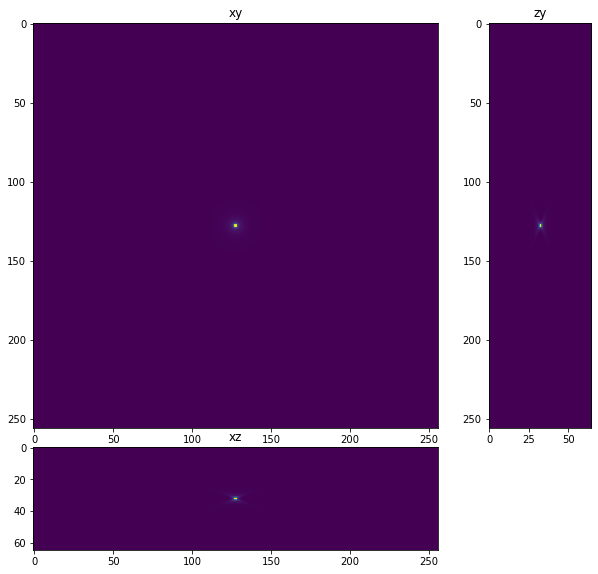

In [15]:
from skimage.io import imread
from tnia.nd.ndutil import centercrop

dir_name='/home/bnorthan/Images/'
base_dir=r'D:\images\tnia-python-images\notebooks'

abrf_psf_name = base_dir+'//'+r'deconvolution/abrf/PSF_widefield_0.75NA_1.0ri_300nm_1400nm.tif'

abrf_psf_ = imread(abrf_psf_name)

print(abrf_psf_.shape)
abrf_psf=centercrop(abrf_psf_,(65,128,128))
abrf_psf=abrf_psf_
print(abrf_psf.shape)
abrf_psf=abrf_psf/abrf_psf.sum()
print(abrf_psf.sum())
fig=show_xyz_max(abrf_psf)

In [8]:
im_=np.ones_like(im)

In [14]:
decon1.max(), decon1.min()

(1.001687, 0.9995807)

get lib


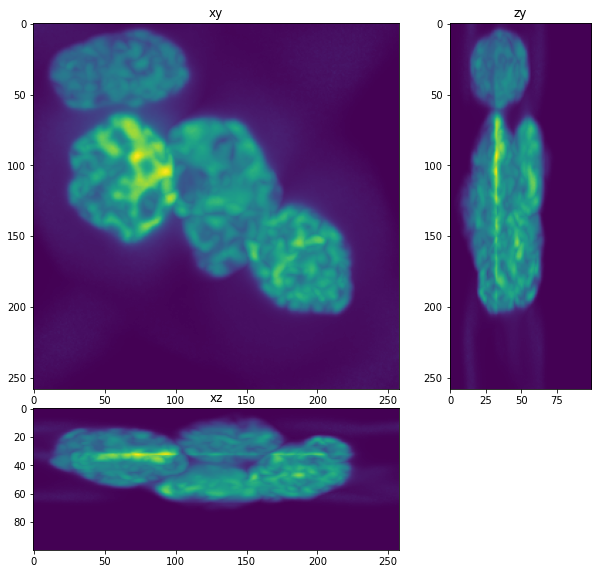

In [17]:
iter=100
decon1=richardson_lucy(im, abrf_psf, iter, 0)
fig = show_xyz_max(decon1)

In [31]:
decon2__=richardson_lucy_nc(im, psf2, 600, 0)

get lib


In [13]:
im2=np.zeros_like(im)
im2=im2+100

Original Image


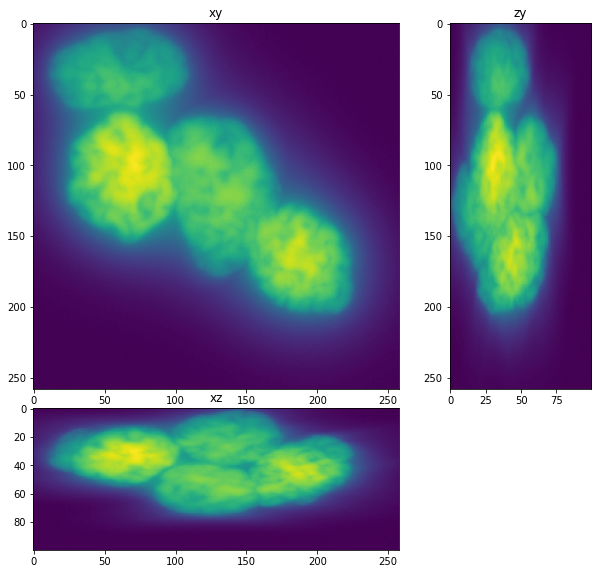

In [14]:
print('Original Image')
fig=show_xyz_max(im)

deconvolved assuming spacing is 0.8


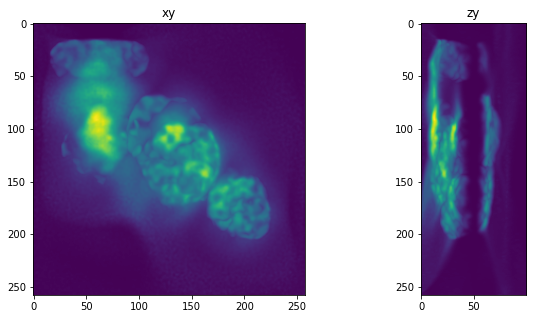

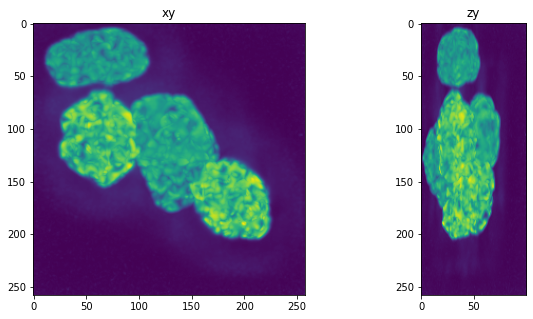

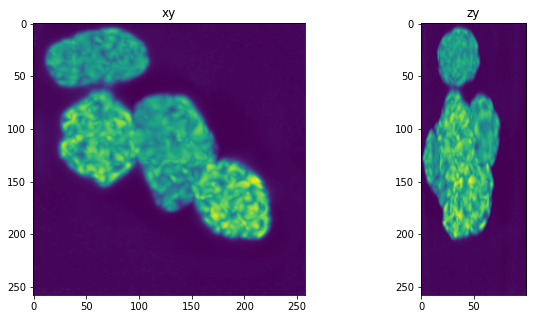

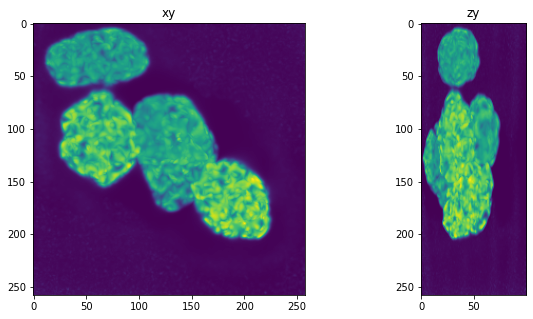

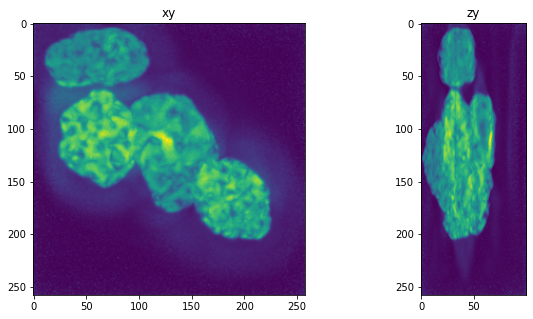

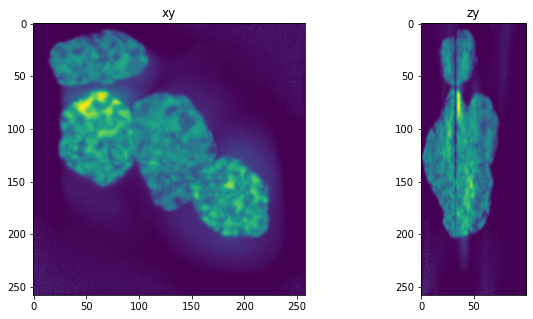

In [33]:
print('deconvolved assuming spacing is 0.8')
fig=show_xy_zy_max(decon1,figsize=(10,5))
fig=show_xy_zy_max(decon2,figsize=(10,5))
fig=show_xy_zy_max(decon2_,figsize=(10,5))
fig=show_xy_zy_max(decon2__,figsize=(10,5))
fig=show_xy_zy_max(decon3,figsize=(10,5))
fig=show_xy_zy_max(decon3_,figsize=(10,5))


In [30]:
print('deconvolved assuming spacing is 0.8')
fig=show_xyz_max(decon2)

deconvolved assuming spacing is 0.8


NameError: name 'decon2' is not defined

deconvolved original parameters


C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


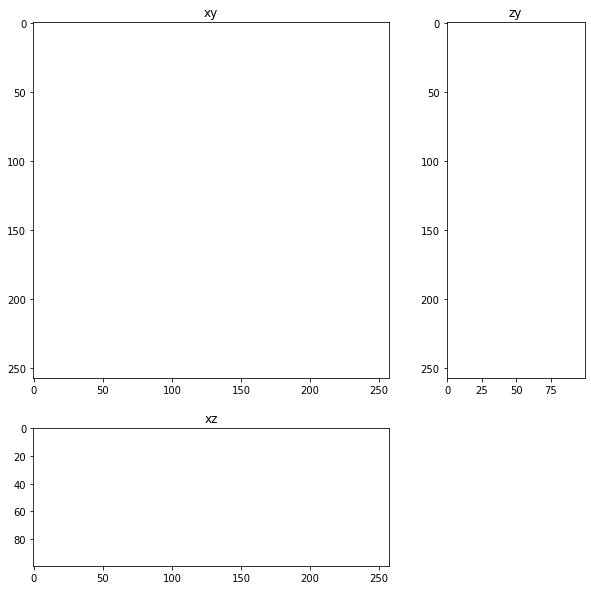

In [43]:
print('deconvolved original parameters')
fig=show_xyz_max(decon1)

In [71]:
imsave(decon_name, decon1)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\_future.py:466: RuntimeWarning: coroutine 'get_msg' was never awaited
  if not self._shadow_sock.get(EVENTS) & POLLIN:


In [72]:
from tnia.viewing.napari_helper import show_image

In [11]:
viewer=show_image(decon1, 'deconvolved')
viewer=show_image(im, 'image', viewer=viewer)

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari\_qt\__init__.py:54: UserWarning: 

IMPORTANT:
You are using QT version 5.9.7, but version 5.15.4 was also found in your environment.
This usually happens when you 'conda install' something that also depends on PyQt
*after* you have pip installed napari (such as jupyter notebook).
You will likely run into problems and should create a fresh environment.
If you want to install conda packages into the same environment as napari,
please add conda-forge to your channels: https://conda-forge.org

  warn(message=warn_message)


In [34]:
## start napari
import napari
viewer = napari.Viewer()

# show images
viewer.add_image(im, scale = [2,1,1])
viewer.add_image(decon2__, scale = [2,1,1])

#viewer.add_image(decon2, scale = [2,1,1])
#viewer.add_image(decon3, scale = [2,1,1])

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'decon2__' at 0x24439ea4dc0>

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\jupyter_client\threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\base_events.py", line 618, in run_until_complete
    self._check_running()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\base_events.py", line 580, in _check_running
    raise RuntimeError(
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqst